# Exploratory Data Analysis

Pada bagian ini dilakukan eksplorasi data untuk mengetahui informasi terkait data set dan kata-kata yang merepresentasikan masing-masing kategori produk

## Import Library

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import gensim

from nltk import tokenize
from nltk.cluster.util import cosine_distance
from nltk.corpus import stopwords
from wordcloud import WordCloud
from gensim.models import Word2Vec

## Data Loading

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Navigate to the directory containing your data
# Change the path as per your file structure
data_path = '/content/drive/My Drive'

# Example: Read CSV data using pandas
import pandas as pd
df = pd.read_csv(data_path + '/sephora_website_dataset.csv')
df_clean = pd.read_csv(data_path + '/clean_data.csv')

# Now, you can work with your data in Colab
df.head()

Mounted at /content/drive


,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


## Cek Null Value dan Duplicated Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

Diketahui semua kolom terisi.

In [4]:
df[df.duplicated()]

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer


Diketahui tidak ada data yang duplikat

## Mengetahui Data Unik Pada Masing-Masing Kolom

In [5]:
df.nunique()

id                        9115
brand                      324
category                   143
name                      9106
size                      1623
rating                      10
number_of_reviews          833
love                      1683
price                      286
value_price                322
URL                       9168
MarketingFlags               2
MarketingFlags_content      10
options                    564
details                   8839
how_to_use                6497
ingredients               6962
online_only                  2
exclusive                    2
limited_edition              2
limited_time_offer           2
dtype: int64

Didapat informasi data bahwa katergori dan brand yang ada pada data set tergolong banyak, sehingga perlu dilakukan penggolongan menjadi grup yang lebih general agar lebih mudah dimasukan ke dalam model.

## Cek Informasi Statistika Deskriptif Masing-Masing Kolom Numerik

In [6]:
df.describe()

,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
count,9.168000e+03,9168.000000,9168.000000,9.168000e+03,9168.000000,9168.00000,9168.000000,9168.000000,9168.000000,9168.000000
mean,1.962952e+06,3.990020,282.139180,1.627859e+04,50.063237,51.82359,0.234839,0.264725,0.091841,0.000327
std,3.859714e+05,1.007707,890.642028,4.260651e+04,47.164989,49.45902,0.423921,0.441211,0.288817,0.018087
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000
25%,1.819453e+06,4.000000,10.000000,1.600000e+03,24.000000,25.00000,0.000000,0.000000,0.000000,0.000000
50%,2.072354e+06,4.000000,46.000000,4.800000e+03,35.000000,35.00000,0.000000,0.000000,0.000000,0.000000
75%,2.230591e+06,4.500000,210.000000,1.380000e+04,59.000000,60.00000,0.000000,1.000000,0.000000,0.000000
max,2.359685e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.00000,1.000000,1.000000,1.000000,1.000000


DItampilkan bahwa data harga produk terendah pada data set adalah 2 dollar dan harga tertinggi pada 549 dollar. Informasi harga ini akan dijadikan sebuah fitur pada sistem rekomendasi.

## Plot Jumlah Produk pada Masing-Masing Kategori

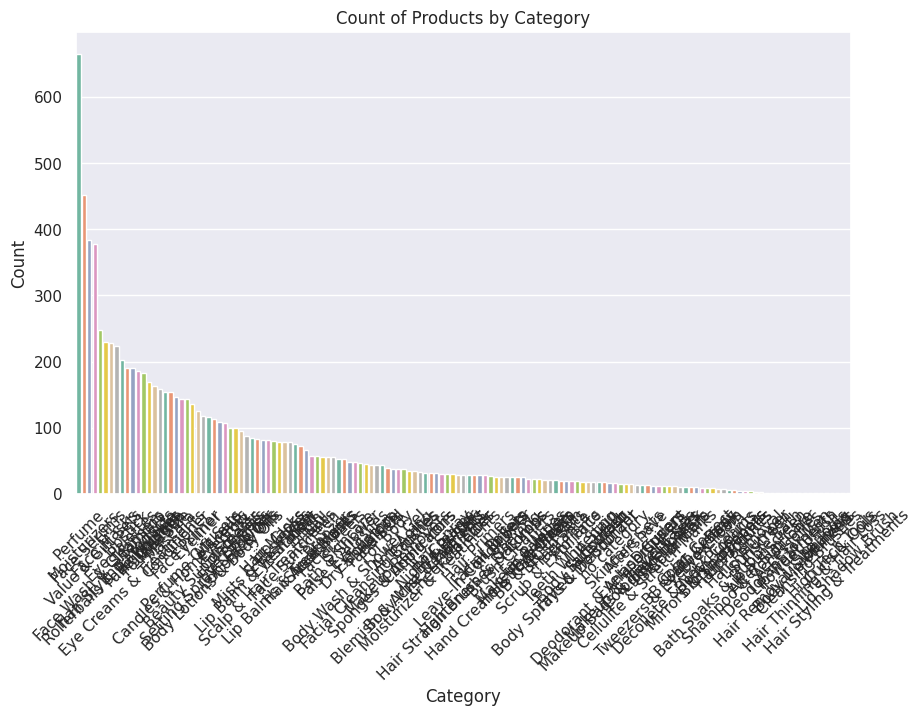

In [7]:
# Calculate counts for each category
category_counts = df['category'].value_counts()

# Sort categories based on counts in descending order
sorted_categories = category_counts.index.tolist()

# Set the order of categories in the countplot
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category', order=sorted_categories, palette="Set2")
plt.title('Count of Products by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()


In [8]:
# Calculate counts for each category
category_counts = df['category'].value_counts()

# Create a new DataFrame with category names and count values
category_counts_df = pd.DataFrame({'Category': category_counts.index, 'Count': category_counts.values})

# Display the new DataFrame
category_counts_df


,Category,Count
0,Perfume,665
1,Moisturizers,451
2,Face Serums,384
3,Value & Gift Sets,378
4,Face Wash & Cleansers,247
...,...,...
138,Wellness,1
139,High Tech Tools,1
140,Hair Styling & Treatments,1
141,Curls & Coils,1


## Melihat banyak Brand Pada Kategori Parfume

In [9]:
# Filter the DataFrame for rows where the category is "perfume"
perfume_df = df[df['category'] == 'Perfume']

# Get unique brand data in the perfume category
unique_brands_perfume = perfume_df['brand'].unique()

# Display unique brand data
unique_brands_perfume

array(['Acqua Di Parma', 'AERIN', 'Armani Beauty', 'Atelier Cologne',
       'BALENCIAGA', 'BERDOUES', 'Bobbi Brown', 'BURBERRY', 'BVLGARI',
       'By Rosie Jane', 'Calvin Klein', 'Carolina Herrera', 'CHANEL',
       'Chloé', 'CLEAN RESERVE', 'CLINIQUE', 'Commodity',
       'Comptoir Sud Pacifique', 'DEREK LAM 10 CROSBY', 'Dior',
       'DOLCE&GABBANA', 'Donna Karan', 'Eight & Bob',
       'Elizabeth and James', 'ELLIS BROOKLYN', 'Estée Lauder',
       "Etat Libre d'Orange", 'Floral Street', 'Fresh', 'Givenchy',
       'Gucci', 'Guerlain', 'HERMÈS', 'HUDA BEAUTY', 'JIMMY CHOO',
       'Jo Malone London', 'John Varvatos', 'Juicy Couture',
       'Juliette Has a Gun', 'kate spade new york', 'Kenzo', 'Kilian',
       'KVD Vegan Beauty', 'Lancôme', 'Maison Louis Marie',
       'Maison Margiela', 'Marc Jacobs Fragrances', 'Michael Kors',
       'Miu Miu', 'Montblanc', 'Moschino', 'Mugler', 'Narciso Rodriguez',
       'NEST New York', 'Origins', 'OUAI', 'Paco Rabanne', 'philosophy',
       

## Plot Jumlah produk perfume pada masing-masing brand

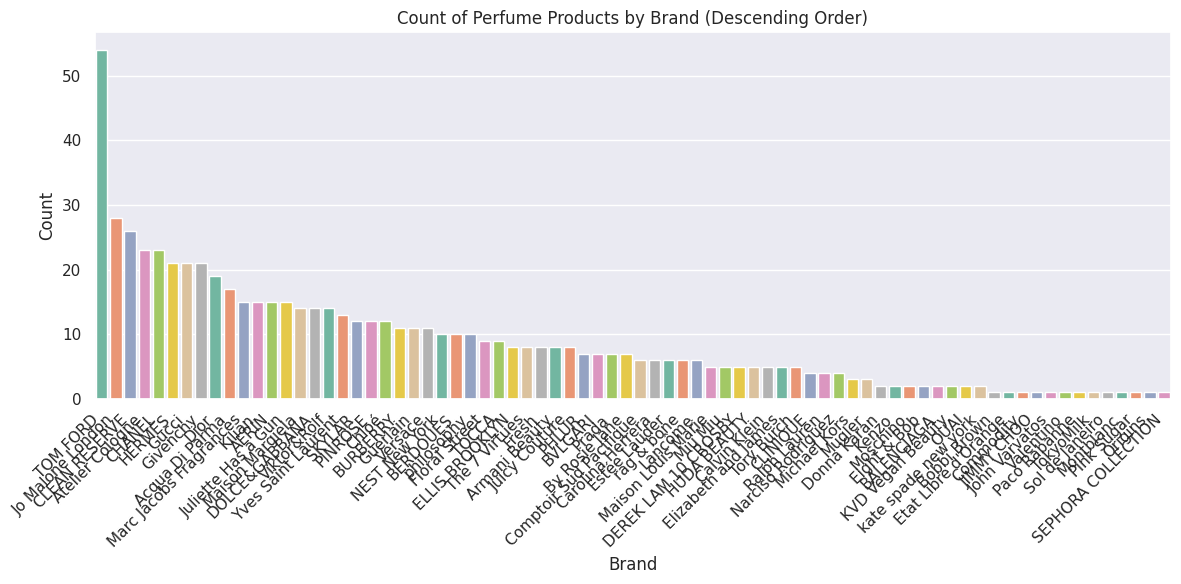

In [10]:
# Calculate counts for each brand
brand_counts = perfume_df['brand'].value_counts()

# Sort the brands based on counts in descending order
sorted_brands = brand_counts.index.tolist()

# Create a count plot of unique brand values in descending order
plt.figure(figsize=(12, 6))
sns.countplot(data=perfume_df, x='brand', order=sorted_brands, palette='Set2')
plt.title('Count of Perfume Products by Brand (Descending Order)')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


## Membuat Word Cloud Kolom Detail

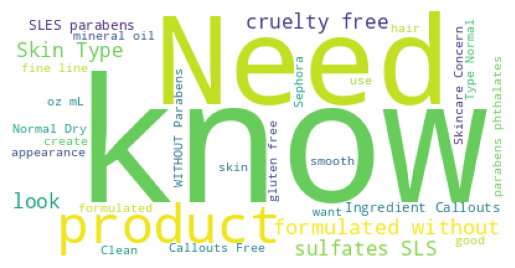

In [11]:
df['details'] = df['details'].astype(str)
word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(" ".join(df['details']))
img = word_cloud.to_image()

fig = plt.figure(1)
plt.imshow(img)
plt.axis('off')
plt.show()


## Membuat WordCLoud Kolom Ingredients

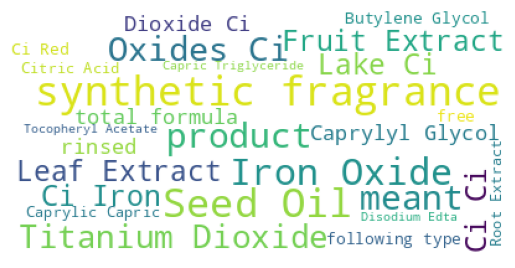

In [12]:
df['ingredients'] = df['ingredients'].astype(str)
word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(" ".join(df['ingredients']))
img = word_cloud.to_image()

fig = plt.figure(1)
plt.imshow(img)
plt.axis('off')
plt.show()

pada kolom ingredients dihasilkankata-kata yang berhubungan ddengan bahan-bahan kimia, dan penulisannya juga ada bentuk khusus, yaitu dipisahkan dengan tanda dash. Selain itu juga di dapat adanya zat kimia yang terdiri dari CI dan susunan angka.

Kami memutuskan untuk tidak memroses informasi ini karena keterbatasan waktu untuk preprocessing treatment yang berbeda.

## Word Cloud pada Masing-Masing Kategori

In [ ]:
# Iterate over each unique category
for category in df['category'].unique():
    # Filter DataFrame for the current category
    category_df = df[df['category'] == category]

    # Concatenate details for the current category into a single string
    category_corpus = " ".join(category_df['details'])

    # Generate word cloud for the current category
    word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(category_corpus)

    # Display the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

In [14]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Get unique categories
# categories = df['category'].unique()

# # Set up the number of rows and columns for subplots
# num_rows = (len(categories) + 1) // 2  # Ensure even number of rows
# num_cols = 2

# # Create subplots
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# # Flatten the axes array if necessary
# axes = axes.flatten()

# # Loop through each category
# for i, category in enumerate(categories):
#     # Filter the DataFrame for rows corresponding to the current category
#     category_df = df[df['category'] == category]

#     # Plot the histogram for the current category
#     sns.histplot(category_df['price'], kde=True, ax=axes[i])
#     axes[i].set_title(f'Price Distribution for {category}')
#     axes[i].set_xlabel('Price')
#     axes[i].set_ylabel('Frequency')

# # Hide any unused subplots
# for i in range(len(categories), num_rows * num_cols):
#     fig.delaxes(axes[i])

# # Adjust layout
# plt.tight_layout()

# # Show plot
# plt.show()


## Buat Kolom Baru berisi Kategori Produk Yang Lebih General

In [15]:
deplist_bath_body = ['Bath & Shower', 'Bath Soaks & Bubble Bath', 'Body Lotions & Body Oils', 'Body Moisturizers', 'Body Products', 'Body Sprays & Deodorant',
    'Body Sunscreen', 'Body Wash & Shower Gel', 'Cellulite & Stretch Marks', 'Deodorant & Antiperspirant', 'Deodorant for Men', 'For Body',
    'For Face', 'Hand Cream & Foot Cream', 'Lotions & Oils', 'Scrub & Exfoliants', 'Self Tanners', 'Wellness']

deplist_fragrance = ['Body Mist & Hair Mist', 'Candles', 'Candles & Home Scents', 'Cologne', 'Diffusers', 'Perfume', 'Rollerballs & Travel Size']

deplist_gifts = ['Cologne Gift Sets', 'Perfume Gift Sets', 'Value & Gift Sets']

deplist_hair = ['Color Care', 'Conditioner', 'Dry Shampoo', 'Hair Masks', 'Hair Oil', 'Hair Primers', 'Hair Products', 'Hair Spray',
                'Hair Styling & Treatments', 'Hair Styling Products', 'Hair Thinning & Hair Loss', 'Leave-In Conditioner', 'Scalp & Hair Treatments',
                'Shampoo', 'Shampoo & Conditioner']

deplist_makeup = ['BB & CC Cream', 'BB & CC Creams', 'Blush', 'Bronzer', 'Color Correct', 'Concealer', 'Contour', 'Eye Palettes', 'Eye Primer',
                  'Eye Sets', 'Eyebrow', 'Eyeliner', 'Eyeshadow', 'Face Primer', 'Face Sets', 'False Eyelashes', 'Foundation', 'Highlighter',
                  'Lip Gloss', 'Lip Liner', 'Lip Plumper', 'Lip Sets', 'Lip Stain', 'Lip Sunscreen', 'Lip Treatments', 'Lipstick', 'Liquid Lipstick',
                  'Makeup Palettes', 'Makeup Removers', 'Mascara', 'Nail', 'Setting Spray & Powder']

deplist_mini = ['Bath & Body', 'Fragrance', 'Hair', 'Makeup', 'Mini Size', 'Skincare']

deplist_others = ['no cat']

deplist_skincare = ['After Sun Care', 'Aftershave', 'Anti-Aging', 'Beauty Supplements', 'Blemish & Acne Treatments', 'Decollete & Neck Creams',
                    'Exfoliators', 'Eye Cream', 'Eye Creams & Treatments', 'Eye Masks', 'Face Masks', 'Face Oils', 'Face Serums', 'Face Sunscreen',
                    'Face Wash', 'Face Wash & Cleansers', 'Face Wipes', 'Facial Peels', 'Hair Removal & Shaving', 'Holistic Wellness',
                    'Lip Balm & Treatment', 'Lip Balms & Treatments', 'Mists & Essences', 'Moisturizer & Treatments', 'Moisturizers', 'Night Creams',
                    'Shaving', 'Sheet Masks', 'Skincare Sets', 'Sunscreen', 'Teeth Whitening', 'Tinted Moisturizer', 'Toners']

deplist_tools_brushes = ['Accessories', 'Blotting Papers', 'Brush Cleaners', 'Brush Sets', 'Cheek Palettes', 'Cleansing Brushes', 'Curling Irons',
    'Curls & Coils', 'Eye Brushes', 'Eyelash Curlers', 'Face Brushes', 'Facial Cleansing Brushes', 'Facial Rollers', 'Hair Accessories',
    'Hair Brushes & Combs', 'Hair Dryers', 'Hair Removal', 'Hair Straighteners & Flat Irons', 'High Tech Tools', 'Lid Shadow Brush',
    'Lip Brushes', 'Makeup & Travel Cases', 'Makeup Bags & Travel Cases', 'Mirrors & Sharpeners', 'Powder Brush', 'Spa Tools',
    'Sponges & Applicators', 'Tweezers & Eyebrow Tools']


condlist = [
    df['category'].isin(deplist_bath_body),
    df['category'].isin(deplist_fragrance),
    df['category'].isin(deplist_gifts),
    df['category'].isin(deplist_hair),
    df['category'].isin(deplist_makeup),
    df['category'].isin(deplist_mini),
    df['category'].isin(deplist_others),
    df['category'].isin(deplist_skincare),
    df['category'].isin(deplist_tools_brushes)
]

choicelist = ['bath_body', 'fragrance', 'gifts', 'hair', 'makeup', 'mini', 'others', 'skincare', 'tools_brushes']

df['new_cat'] = np.select(condlist, choicelist)

In [16]:
df.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,new_cat
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0,mini
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0,fragrance
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0,fragrance
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0,fragrance
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0,mini


## Buat WordCloud sesuai Kategori Yang Baru Dibuat

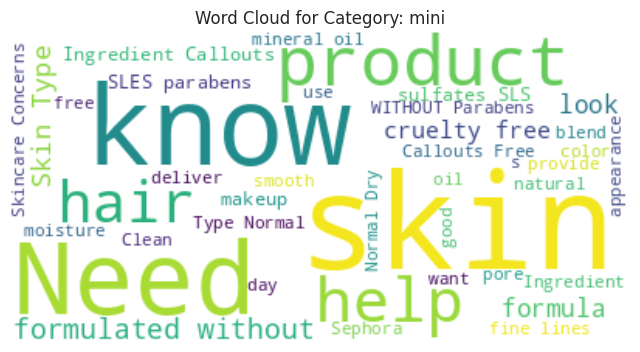

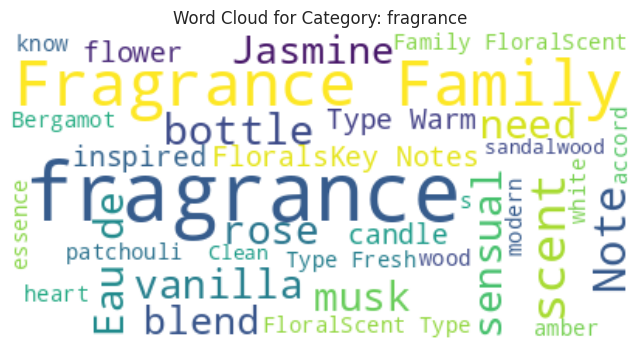

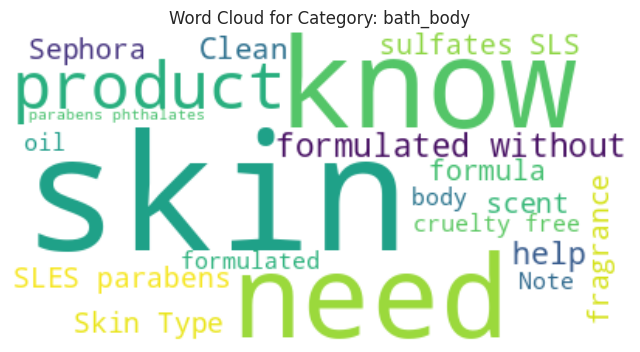

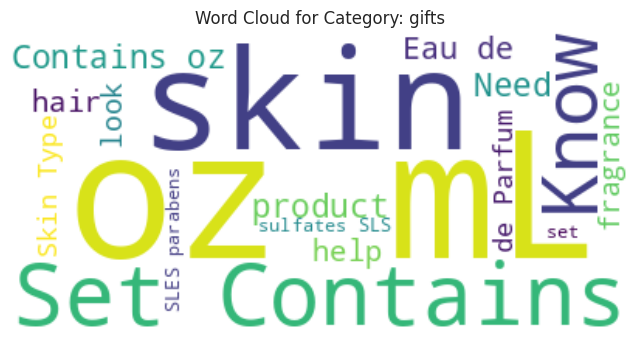

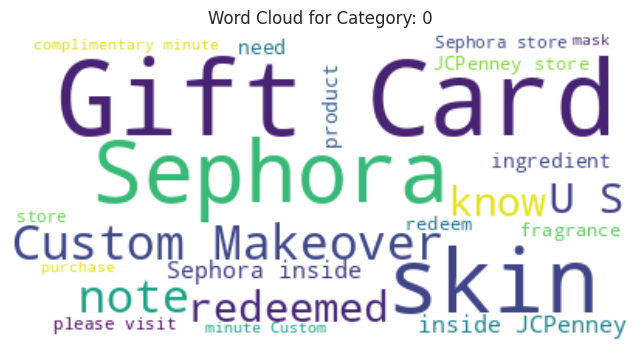

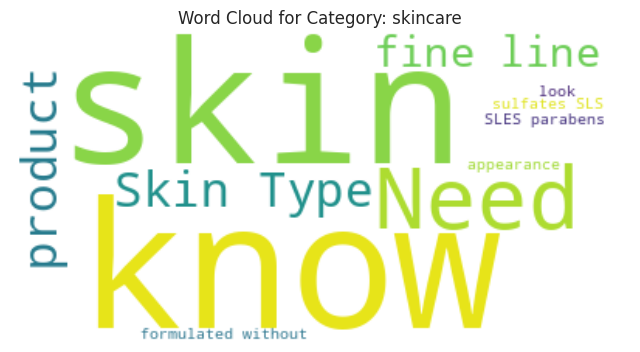

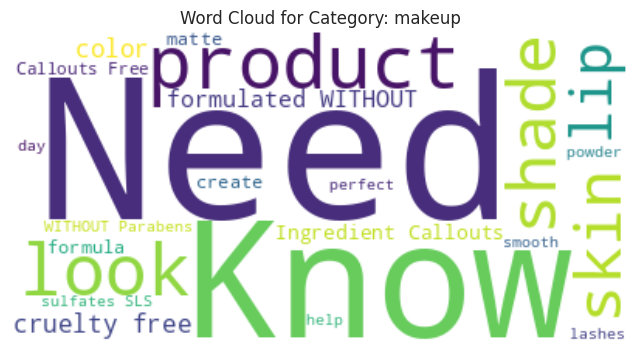

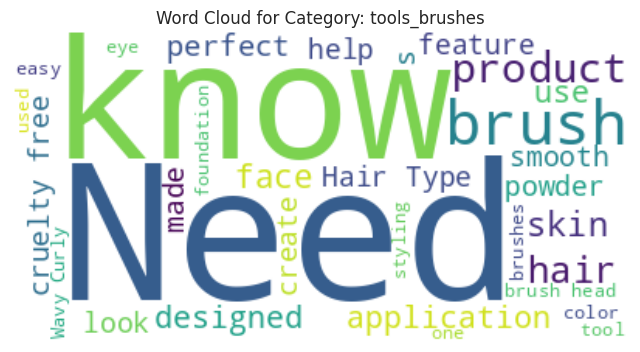

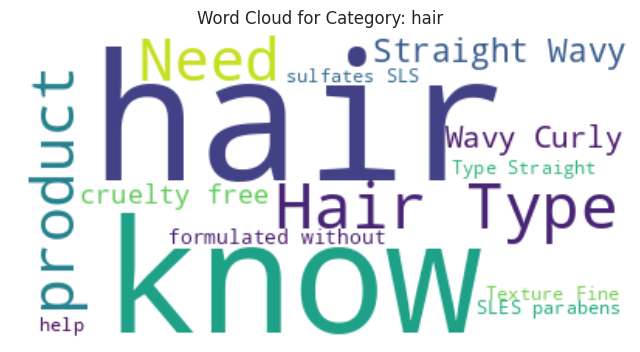

In [17]:
# Iterate over each unique category
for new_cat in df['new_cat'].unique():
    # Filter DataFrame for the current category
    newcategory_df = df[df['new_cat'] == new_cat]

    # Concatenate details for the current category into a single string
    category_corpus = " ".join(newcategory_df['details'])

    # Generate word cloud for the current category
    word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(category_corpus)

    # Display the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {new_cat}')
    plt.axis('off')
    plt.show()

# Clean Data

## Loading Data Yang Sudah Dibersihkan Oleh Data Engineer

In [20]:
df_clean.head(3)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,new_category,details_category,preprocessing_details_category
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0,mini,This enchanting set comes in a specially handc...,enchanting set comes specially handcrafted blu...
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0,fragrance,An elegant timeless scent filled with a fresh-...,elegant timeless scent filled fresh luminous b...
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0,fragrance,Fragrance Family: Fresh Scent Type: Fresh Citr...,fragrance family fresh scent type fresh citrus...


## Membuat Pie Chart persentase produk pada kategori yang baru

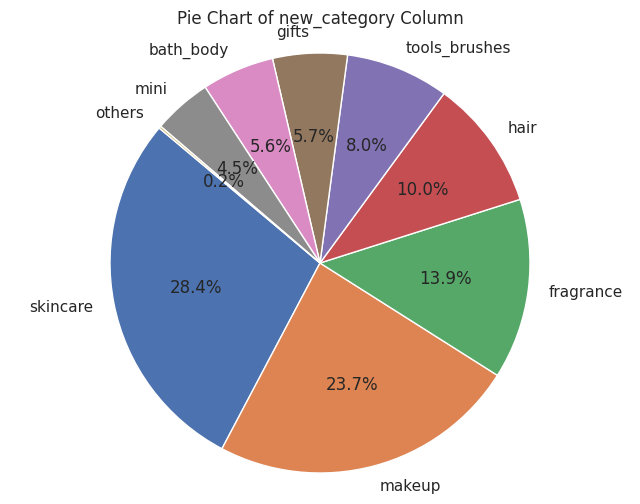

In [22]:
# Calculate frequency of each category
category_counts = df_clean['new_category'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart of new_category Column')
plt.show()

## Tampilkan Word Cloud Masing-Masing Kategori Data yang sudah Bersih

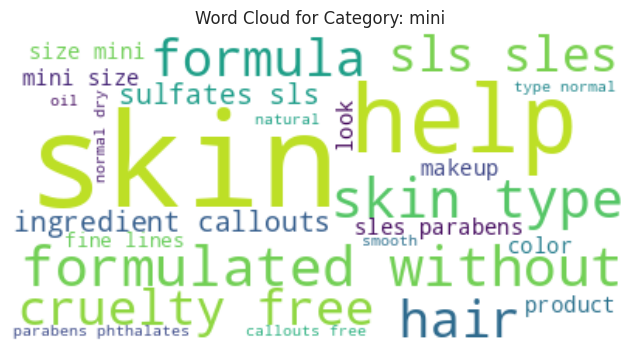

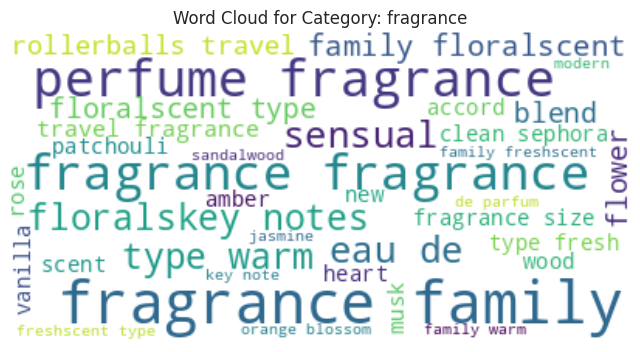

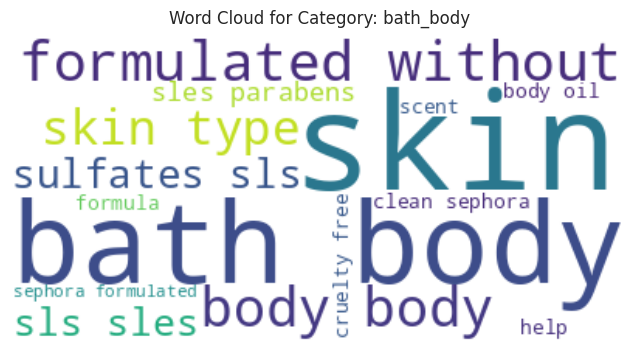

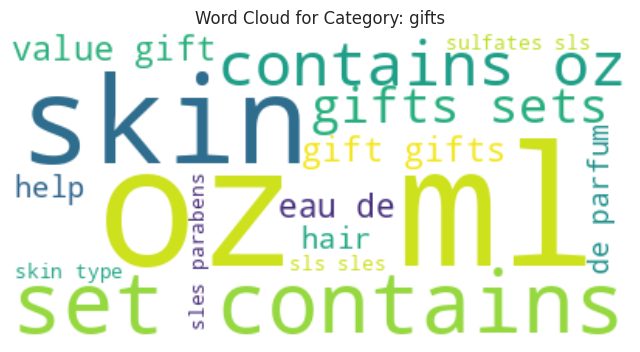

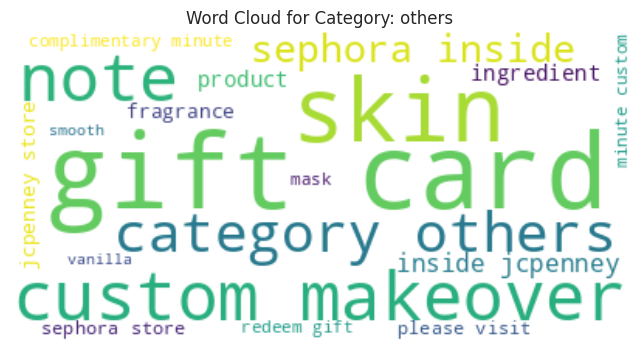

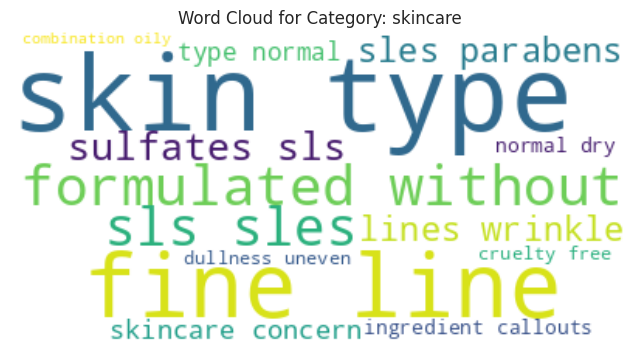

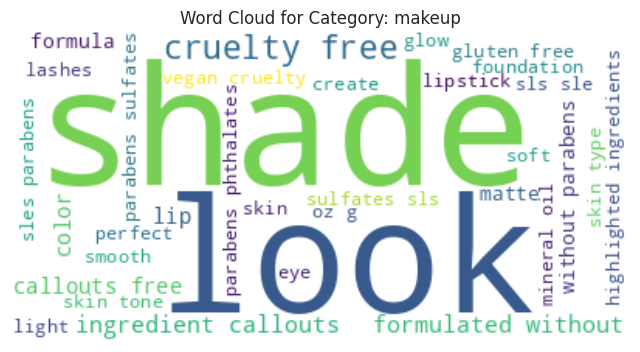

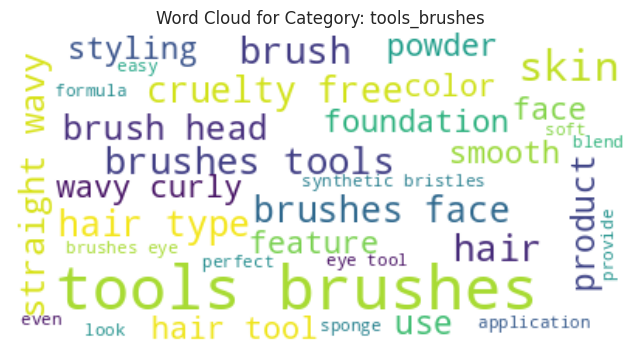

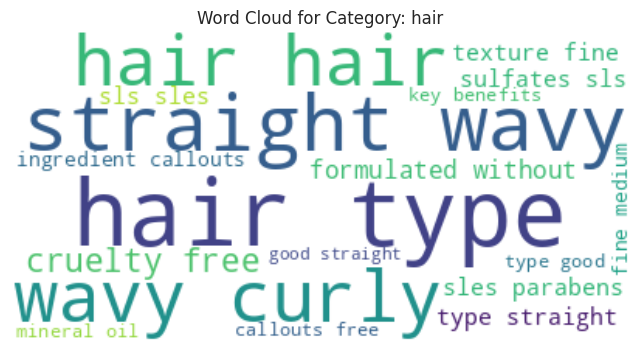

In [19]:
# Iterate over each unique category
for new_cat in df_clean['new_category'].unique():
    # Filter DataFrame for the current category
    newcategory_df = df_clean[df_clean['new_category'] == new_cat]

    # Concatenate details for the current category into a single string
    category_corpus = " ".join(newcategory_df['preprocessing_details_category'])

    # Generate word cloud for the current category
    word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(category_corpus)

    # Display the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {new_cat}')
    plt.axis('off')
    plt.show()